In [17]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
h=fits.open('lightcurve_1.fits')
h.info()

Filename: lightcurve_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  LIGHTCURVE    1 BinTableHDU    156   3862R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (10, 9)   int32   


In [18]:
k=h[2].data
print(k)

[[ 9  9  9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9  9  9]
 [ 9  9  9  9 13 13 13 13  9  9]
 [ 9  9  9 13 13 15 15 13  9  9]
 [ 9  9  9 13 15 15 15 13  9  9]
 [ 9  9  9 13 13 15 15 13  9  9]
 [ 9  9  9  9 13 13 13 13  9  9]
 [ 9  9  9  9  9  9  9  9  9  9]
 [ 0  9  9  9  9  9  9  9  9  9]]


In [19]:
k=h[1].data.columns
print(k)


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

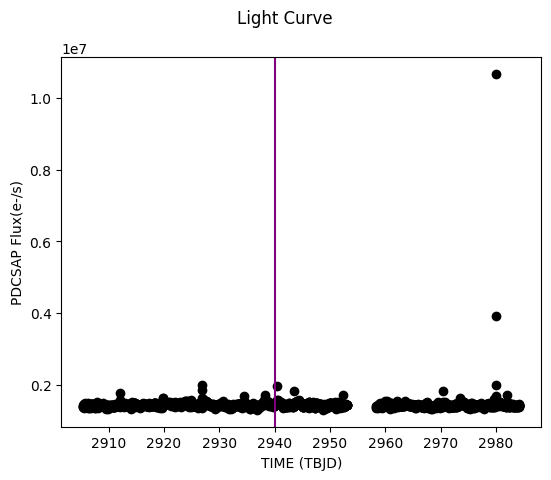

In [20]:
tess=h[1].data['TIME']
sap=h[1].data['SAP_FLUX']
pdcsap=h[1].data['PDCSAP_FLUX']
t=2940
fig,ax=plt.subplots()
ax.plot(tess,pdcsap,'ko')

ax.axvline(x=t, color="purple")
fig.suptitle("Light Curve")
ax.set_ylabel("PDCSAP Flux(e-/s)")
ax.set_xlabel("TIME (TBJD)")
plt.subplots_adjust(left=0.15)
plt.show()





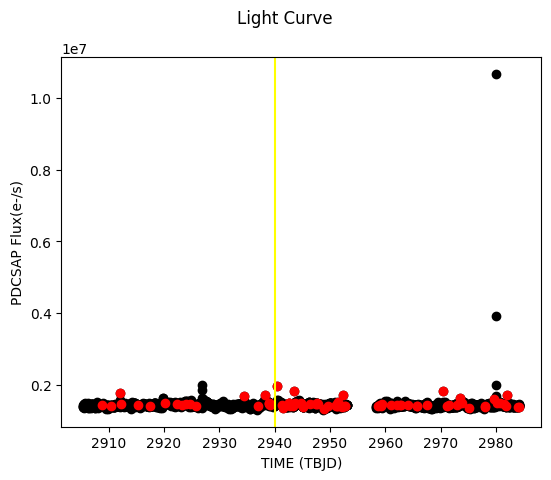

In [21]:
tess=h[1].data['TIME']
sap=h[1].data['SAP_FLUX']
pdcsap=h[1].data['PDCSAP_FLUX']
qual=h[1].data['SAP_QUALITY']
t=2940
#filter data
pdc_sap_flux_filtered= pdcsap[qual>0]
time_filtered = tess[qual>0]
fig,ax=plt.subplots()
ax.plot(tess,pdcsap,'ko')
ax.plot(time_filtered, pdc_sap_flux_filtered,'ro',label='sap quality>0')
ax.axvline(x=t, color="yellow")
fig.suptitle("Light Curve")
ax.set_ylabel("PDCSAP Flux(e-/s)")
ax.set_xlabel("TIME (TBJD)")
plt.subplots_adjust(left=0.15)
plt.show()
